## Bibliotecas

In [1]:
import pandas as pd                                     # Tratamiento de datos
from sklearn.model_selection import StratifiedKFold     # Clases desequelibradas
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score
import statistics                                       # Estadisticas

import seaborn as sns                                   # Graficos
import matplotlib.pyplot as plt                         # Graficos

## Leer dataset

In [2]:
dataset = pd.read_csv('data_kmeans.csv')
dataset.head()

,Puntuación,Dificultad,Categoria
0,4.8,3.6,Malo
1,6.0,5.3,Malo
2,5.2,1.8,Bueno
3,8.0,3.3,Regulare
4,5.5,4.2,Malo


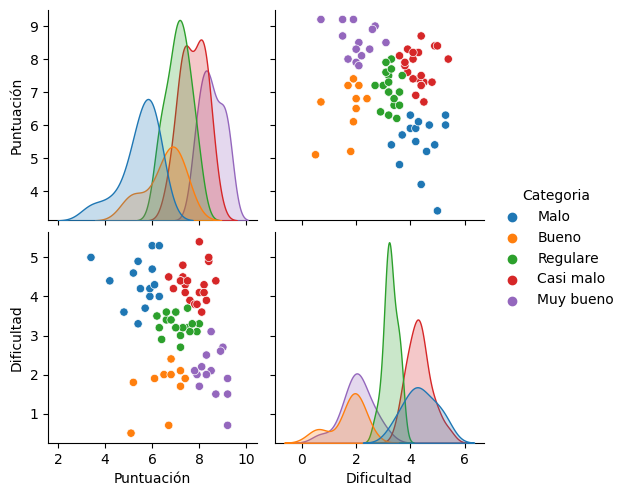

In [3]:
sns.pairplot(dataset, hue='Categoria')


## Separar rasgos y clases 

In [4]:
x = dataset.iloc[:, [0, 1]].values
y = dataset.iloc[:, 2].values

## Preprocesamiento

## Modelo a evaluar

In [5]:
from sklearn.naive_bayes import GaussianNB

## Metodos de validación

In [6]:
# --> Listas de métricas
lista_exactitud = []
lista_precision = []
lista_f1score = []
lista_sensibilidad = []

In [7]:
# --> Objeto para validacion
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# --> Iteraciones
for entrenamiento, prueba in skf.split(x, y):
    # --> Separar datos en entrenamiento y prueba
    x_entrenamiento, x_prueba = x[entrenamiento], x[prueba]
    y_entrenamiento, y_prueba = y[entrenamiento], y[prueba]

    # --> Clasificador de bayes
    y_predicha = GaussianNB().fit(x_entrenamiento, y_entrenamiento).predict(x_prueba)

    # --> Metricas
    lista_exactitud.append(accuracy_score(y_prueba, y_predicha))
    lista_precision.append(precision_score(y_prueba, y_predicha, average="macro"))
    lista_f1score.append(f1_score(y_prueba, y_predicha, average="macro"))
    lista_sensibilidad.append(recall_score(y_prueba, y_predicha, average="macro"))


In [8]:
print(f"""
[+]Exactitud:\t {round(100*(statistics.mean(lista_exactitud)), 2)} %
[+]Presicion:\t {round(100*(statistics.mean(lista_precision)), 2)} %
[+]F1-score:\t {round(100*(statistics.mean(lista_f1score)), 2)} %
[+]Sensibilidad: {round(100*(statistics.mean(lista_sensibilidad)), 2)} %
""")



[+]Exactitud:	 97.64 %
[+]Presicion:	 98.67 %
[+]F1-score:	 97.87 %
[+]Sensibilidad: 98.0 %



## Busqueda de mejores parametros

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)


In [10]:
from sklearn.model_selection import GridSearchCV

# --> Parametros a evaluar
parametros = [
    {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]},
    {'var_smoothing': [1e-10, 1e-11, 1e-12, 1e-13, 1e-14]}
]

# --> Crear objeto de busqueda
busqueda = GridSearchCV(
    estimator = GaussianNB(), 
    param_grid=parametros, 
    scoring='accuracy', 
    cv=skf                       # Entero si esta balanceado el dataset
    )

# --> Entrenar objeto de busqueda
busqueda = busqueda.fit(x_train, y_train)

# --> Resultados
print(f"[+]Mejor exactitud: {100*busqueda.best_score_} %")
print(f"[+]Mejores parametros: {busqueda.best_params_}")



c:\Users\uriel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


[+]Mejor exactitud: 93.33333333333333 %
[+]Mejores parametros: {'var_smoothing': 1e-09}


In [13]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)
classifier.score(x_test, y_test)


1.0